# Pandas

Pandas contém estruturas de dados e ferramentas de manipulação de dados projetadas para fazer a limpeza de dados e análise rápida e fácil em Python. 
- **pandas** é frequentemente usado em conjunto com ferramentas numéricas de computação como NumPy e SciPy, bibliotecas analíticas como modelos estatísticos e de aprendizado de máquina (como o scikit-learn) e bibliotecas de visualização de dados como matplotlib. 
- pandas adota partes significante do estilo idiomático de NumPy, de computação vetorial.

Enquanto o pandas adota muitas partes da codificação do NumPy, a maior diferença é que
**O pandas foi projetado para trabalhar com dados tabulares ou heterogêneos**. 
- **NumPy**, por outro lado, é mais adequado para trabalhar com **dados vetoriais numéricos - homogêneos**.

In [1]:
import pandas as pd

In [2]:
import numpy as np

Assim, sempre que você vir **pd** no código, está se referindo a pandas. Você também pode achar mais fácil para importar **Series** e **DataFrame** para o namespace local, uma vez que são  frequentemente usados:

In [3]:
from pandas import Series, DataFrame

## Introdução às estruturas de dados do pandas

Para começar com o **pandas**, você precisa se familiarizar com seus principais 
estruturas de dados: **Series** e **DataFrame**. 
- Embora não sejam uma solução universal para todos os problemas, elas fornecem uma base sólida e fácil de usar para a maioria das aplicações.

# Series

Uma **Serie** é um **objeto unidimensional semelhante a um vetor** contendo
- uma sequência de valores (de tipos semelhantes aos tipos NumPy) 
- e um vetor associado de rótulos de dados, chamados de índice.

**Serie** mais simples é formada apenas por um vetor de dados:

In [4]:
obj = pd.Series([4, 7, -5, 3])

In [5]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

- A representação de string de uma **Serie** exibida interativamente mostra o índice na esquerda e os valores à direita. 
    - Como não especificamos um índice para os dados, o padrão consiste em inteiros de $0$ a $N - 1$ (onde N é o comprimento do dados).
- Você pode obter a representação de vetor e o objeto de índice da **Serie** via seus atributos **values** e **index**, respectivamente:

In [6]:
obj.values

array([ 4,  7, -5,  3])

In [7]:
obj.index

RangeIndex(start=0, stop=4, step=1)

Frequentemente, será desejável criar uma **Serie** com um índice identificando cada ponto de dados com um rótulo:

In [8]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])

In [9]:
obj2

d    4
b    7
a   -5
c    3
dtype: int64

Comparado com vetores **NumPy**, você pode usar rótulos no índice ao selecionar
valores ou um conjunto de valores:

In [10]:
obj2['a']

-5

In [11]:
obj2['d'] = 6

In [12]:
obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

Usando funções NumPy ou operações semelhantes a NumPy, como a filtragem com um vetor booleano,  multiplicação escalar ou aplicação de funções matemáticas preservará as associações **_índice-valor_**:

In [13]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [14]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [15]:
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

Outra maneira de pensar sobre uma **Serie** é como um dicionário ordenado de comprimento fixo,
- pois é um mapeamento de valores de índice para valores de dados. 
- Pode ser usado em muitos contextos onde você poderia usar um dicionário.

In [16]:
'b' in obj2

True

Se você tiver dados contidos em um dicionário Python, você pode criar uma **Serie** a partir dele passando o dicionário:

In [17]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

In [18]:
obj3 = pd.Series(sdata)

In [19]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

- Você pode passar as chaves de dicionário na ordem que você deseja que apareçam na **Serie** resultante:

In [20]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

In [21]:
obj4 = pd.Series(sdata, index=states)

In [22]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

Aqui, três valores encontrados em *sdata* foram colocados nos locais apropriados, mas como
nenhum valor para *Califórnia* foi encontrado, ele aparece como **NaN** (*Not a Number*), que é considerado em pandas para marcar valores ausentes. 
- Uma vez que *Utah* não foi incluído em estados, ele é excluído do objeto resultante.

As funções **isnull** e **notnull** em **pandas** devem ser usadas para detectar dados ausentes:

In [23]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [24]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

Um recurso de **Serie** útil para muitas aplicações é que **se alinham automaticamente por índices de rótulo** em operações aritméticas:

In [25]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [26]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [27]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

O próprio objeto **Serie** e seu índice têm um atributo de nome (**name**), que se integra com
outras áreas importantes da funcionalidade do pandas:

In [28]:
obj4.name = 'population'

In [29]:
obj4.index.name = 'state'

In [30]:
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

O índice da uma **Serie** pode ser alterado por atribuição:

In [31]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [32]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']

In [33]:
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

# DataFrame

Um **DataFrame** representa uma tabela retangular de dados e contém uma coleção ordenada
de colunas, cada uma das quais pode ser de um tipo de valor diferente (numérico, string,
booleano, etc.). 
- O DataFrame possui um índice de linha e de coluna.
- Os dados são armazenados como um ou mais blocos bidimensionais em vez de uma lista, dicionário ou alguma outra coleção de vetor unidimensional.

Existem muitas maneiras de construir um **DataFrame**, embora uma das mais comuns seja
a partir de um *dicionário com listas de comprimento igual* ou *matrizes NumPy*

In [34]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002, 2003],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [35]:
frame = pd.DataFrame(data)

In [36]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


Para grandes **DataFrames**, o método **head** seleciona apenas as cinco primeiras linhas

Você especificar uma sequência de colunas para rearranja o **DataFrame**

In [43]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


Se você passar uma coluna que não está contida no dicionário, ela aparecerá com valores ausentes no resultado:

In [47]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], index=['one', 'two', 'three', 'four', 'five', 'six'])

In [48]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [49]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

Uma coluna em um DataFrame pode ser recuperada como uma **Serie** por atributo usando notação semelhante à de dicionário:

In [50]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [51]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

Observe que as **Series** retornadas têm o mesmo índice do **DataFrame** e seus nomes de
atributo foi definido apropriadamente.

As linhas também podem ser recuperadas por posição ou nome com o atributo **loc**

In [1]:
frame2.loc['three']

NameError: name 'frame2' is not defined

As colunas podem ser modificadas por atribuição. 
- Por exemplo, pode-se atribuir à coluna vazia *debt* um valor escalar ou uma matriz de valores:

In [43]:
frame2['debt'] = 16.5

In [44]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [45]:
frame2['debt'] = np.arange(6.)

In [46]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


- Quando você atribui listas ou matrizes a uma coluna, o comprimento do valor deve corresponder ao comprimento do **DataFrame**. 
- Se você atribuir uma **Serie**, seus rótulos serão realinhados exatamente para o índice do **DataFrame**, inserindo valores ausentes em onde não há dados:

In [47]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])

In [48]:
val

two    -1.2
four   -1.5
five   -1.7
dtype: float64

In [49]:
frame2['debt'] = val

In [50]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


Atribuindo uma coluna que não existe criará uma nova coluna. 
- A palavra-chave **del** exclui as colunas como com um dicionário.

Como exemplo de **del**, primeiro adicionamos uma nova coluna de valores booleanos onde o estado da coluna é igual a 'Ohio':

In [51]:
frame2['eastern'] = frame2.state == 'Ohio'

In [52]:
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


Novas colunas **não podem ser criadas** com a sintaxe *frame2.eastern*

O método **del** pode então ser usado para remover esta coluna:

In [53]:
del frame2['eastern']

In [54]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


A **coluna retornada da indexação de um DataFrame é uma _view_** dos dados subjacentes, não uma cópia. 
- Portanto, quaisquer modificações local na **Serie** será refletida no **DataFrame**. 
    - A coluna pode ser copiada explicitamente com o método de **copy** da **Serie**.

Outra forma comum de dados é um dicionário aninhado

In [36]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [37]:
pop

{'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

Se o dicionário aninhado for passado para o **DataFrame**, o **pandas** interpretará as **chaves externas do como as colunas** e as **chaves internas como os índices de linha**:

In [38]:
frame3 = pd.DataFrame(pop)

In [39]:
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


Você pode **transpor o DataFrame** (trocar linhas e colunas) com sintaxe semelhante a uma matriz NumPy:

In [40]:
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


Dicionários de **Serie** são tratados da mesma maneira:

In [41]:
pdata = {'Ohio': frame3['Ohio'][:-1], 'Nevada': frame3['Nevada'][:2]}

In [42]:
pdata

{'Ohio': 2001    1.7
 2002    3.6
 Name: Ohio, dtype: float64,
 'Nevada': 2001    2.4
 2002    2.9
 Name: Nevada, dtype: float64}

In [43]:
pd.DataFrame(pdata)

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


Se o índice e as colunas de um **DataFrame** tiverem seus atributos de nome definidos, eles também serão exibido:

In [63]:
frame3.index.name = 'year'; frame3.columns.name = 'state'

In [64]:
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


Tal como acontece com **Series**, o atributo **values** retorna os dados contidos no **DataFrame** como um **ndarray** bidimensional:

In [65]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

Se as colunas do **DataFrame** são **dtypes** diferentes, o **dtype** da matriz de valores será
escolhido para acomodar todas as colunas:

In [66]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

Possíveis entradas de dados para o construtor **DataFrame**

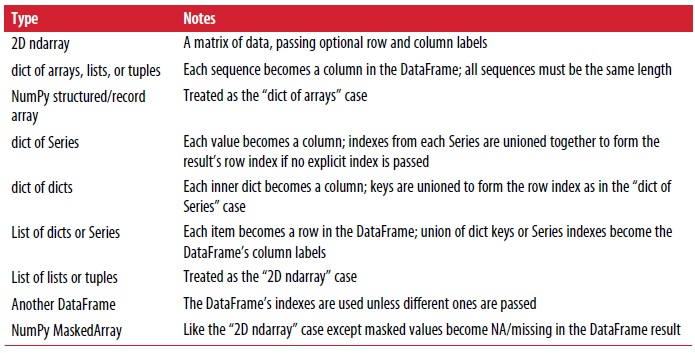

## Objetos de índices

Os objetos de índice do **pandas** são responsáveis por manter os rótulos dos eixos e outros metadados (como os nomes dos eixo). 
- Qualquer vetor ou outra sequência de rótulos que você usar quando construir uma **Serie** ou **DataFrame** será convertida em um índice:

In [67]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])

In [68]:
obj

a    0
b    1
c    2
dtype: int64

In [69]:
index = obj.index

In [70]:
index

Index(['a', 'b', 'c'], dtype='object')

In [71]:
index[1:]

Index(['b', 'c'], dtype='object')

Os objetos de índice são imutáveis e, portanto, não podem ser modificados pelo usuário:

`index[1] = 'd'`  # error

In [72]:
labels = pd.Index(np.arange(3))

In [73]:
labels

Int64Index([0, 1, 2], dtype='int64')

In [74]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)

In [75]:
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [76]:
obj2.index is labels

True

Além de ser semelhante a um vetor, um índice também se comporta como um conjunto de tamanho fixo:

In [77]:
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [78]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [79]:
'Ohio' in frame3.columns

True

In [80]:
2002 in frame3.index

True

Ao contrário dos conjuntos Python, um **índice pandas pode conter rótulos duplicados**. As seleções com rótulos duplicados irão selecionar todas as ocorrências desse rótulo.

In [81]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])

In [82]:
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

Cada índice tem uma série de métodos e propriedades que respondem à perguntas comuns sobre os dados que eles contém.

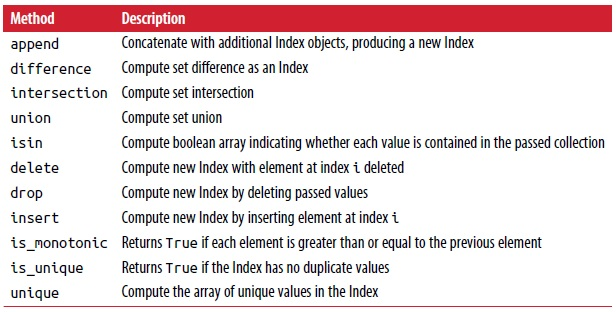

## Funcionalidade essencial

Um método importante em objetos pandas é o **reindex**, que significa criar um novo
objeto com os dados em conformidade com um novo índice. Considere um exemplo:

In [83]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])

In [84]:
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

Chamar reindex nesta **Serie** reorganiza os dados de acordo com o novo índice, apresentando
valores ausentes se algum valor de índice ainda não estiver presente:

In [85]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])

In [86]:
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

Para dados ordenados como séries temporais, pode ser desejável fazer alguma **interpolação ou preenchimento** de valores ao reindexar. 
- A opção do **ffill** do método **reindex** nos permite preencher valores:

In [87]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])

In [88]:
obj3

0      blue
2    purple
4    yellow
dtype: object

In [89]:
obj3.reindex(range(6)) # does nor interpolate

0      blue
1       NaN
2    purple
3       NaN
4    yellow
5       NaN
dtype: object

In [90]:
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

Com DataFrame, **reindex** pode alterar o índice de linha (**index**), das colunas (**columns**) ou ambos**. 
- Quando passamos apenas uma sequência, ele reindexa as linhas no resultado

In [91]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
....: index=['a', 'c', 'd'],
....: columns=['Ohio', 'Texas', 'California'])

In [92]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [93]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])

In [94]:
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


As colunas podem ser reindexadas com o argumento **columns**

In [95]:
states = ['Texas', 'Utah', 'California']

In [96]:
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


Mais sobre **reindex**.

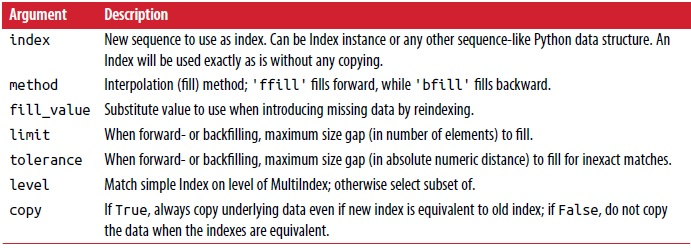

Você pode reindexar de forma mais sucinta por **indexação de rótulo com loc**.

In [104]:
frame.loc[['a', 'b', 'c', 'd'], states]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Texas,Utah,California
a,1.0,NaN,2.0
b,NaN,NaN,NaN
c,4.0,NaN,5.0
d,7.0,NaN,8.0


## Eliminando entradas de um eixo

Eliminar uma ou mais entradas de um eixo é fácil se você já tiver uma matriz de índice
ou lista sem essas entradas. 
- O método **drop** retorna um novo objeto com o valor indicado ou valores excluídos de um eixo:

In [44]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])

In [45]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [46]:
new_obj = obj.drop('c')

In [101]:
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [47]:
obj # permanece o mesmo

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [48]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

Com **DataFrame**, os valores de índice podem ser excluídos de qualquer eixo. Para ilustrar isso, vamos criar um exemplo de **DataFrame**:

In [49]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
.....: index=['Ohio', 'Colorado', 'Utah', 'New York'],
.....: columns=['one', 'two', 'three', 'four'])

In [50]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Chamar **drop** com uma sequência de rótulos eliminará os valores dos rótulos de linha (eixo 0):

In [105]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


Você pode eliminar valores das colunas passando **axis = 1** ou **axis = 'columns'**

In [106]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [107]:
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


Muitas funções, como **drop**, que modificam o tamanho ou a forma de uma **Serie** ou **DataFrame**, podem **manipular um objeto no local** sem retornar um novo objeto. 
- **_Tenha cuidado com o local, pois ele destrói quaisquer dados que sejam descartados._**

In [108]:
obj.drop('c', inplace=True)

In [109]:
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

# Indexação, seleção, e filtro

A indexação de **Serie** `(obj[...])` funciona de maneira análoga à indexação de arrays NumPy, exceto que você pode usar os valores de índice da **Serie** em vez de apenas inteiros. Aqui vemos alguns exemplos:

In [110]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])

In [111]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [112]:
obj['b']

1.0

In [113]:
obj[1]

1.0

In [114]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [115]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [116]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

**Fatiar** com rótulos se comporta de maneira diferente do fatiamento Python normal em que o 
**final é inclusivo**:

In [117]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

Definir usando esses métodos modifica a seção correspondente da **Serie**:

In [118]:
obj['b':'c'] = 5

In [119]:
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

A indexação em um **DataFrame** é usada para recuperar uma ou mais colunas com um único
valor ou sequência:

In [120]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
.....: index=['Ohio', 'Colorado', 'Utah', 'New York'],
.....: columns=['one', 'two', 'three', 'four'])

In [121]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [122]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [123]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


Uma indexação como esta tem alguns casos especiais. Primeiro, fatiar ou selecionar dados com um array booleano:

In [124]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [125]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Os dados de sintaxe de seleção de linha **`data[:2]`** são fornecidos por conveniência. Passando um único elemento ou uma lista para o operador **[ ]** seleciona colunas.

Outro caso de uso é a indexação com um **DataFrame** booleano, como um produzido por um
comparação escalar:

In [126]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [127]:
data[data < 5] = 0

In [128]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


#### Seleção com *loc* e *iloc*

Para **DataFrame**, *indexação de rótulo nas linhas*, podemos usar os operadores de indexação especiais **loc** e **iloc**. 
- Eles permitem selecionar um subconjunto de linhas e colunas de um **DataFrame** com notação semelhante a NumPy usando *rótulos de eixo* (**loc**) ou *inteiros* (**iloc**).

Como um exemplo preliminar, vamos selecionar uma única linha e várias colunas por rótulo:

In [129]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

Em seguida, realizaremos algumas seleções semelhantes com inteiros usando **iloc**:

In [130]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int32

In [131]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [132]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


In [133]:
data.iloc[[2]]   # 

,one,two,three,four
Utah,8,9,10,11


In [141]:
type(data.iloc[[2]])  # [[]]  data frame

pandas.core.frame.DataFrame

In [142]:
type(data.iloc[2]) #  []  series

pandas.core.series.Series

Ambas as funções de indexação funcionam com cortes, além de rótulos únicos ou listas de rótulos:

In [134]:
data.loc[:'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int32

In [135]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


In [136]:
data.iloc[:,:2]  # [LINHA, COLUNA]

,one,two
Ohio,0,0
Colorado,0,5
Utah,8,9
New York,12,13


Portanto, há muitas maneiras de selecionar e reorganizar os dados contidos em um objeto **pandas**.

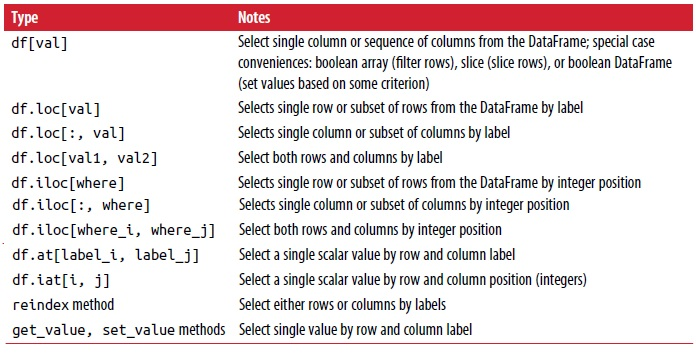

## Índices inteiros

Trabalhar com objetos pandas indexados por inteiros é algo usuários novos muitas vezes tropeçam devido a algumas diferenças com a semântica de indexação em dados Python, como em listas e tuplas. 
Por exemplo, você pode não esperar o seguinte código
para gerar um erro:

In [137]:
ser = pd.Series(np.arange(3.))

In [138]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [139]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])

In [140]:
ser2[-1]  # funciona  para indice nao numerico

2.0

Para manter as coisas consistentes, se você tiver um índice de eixo contendo inteiros, a seleção de dados será sempre orientado para rótulo.
- Para um manuseio mais preciso, use **loc** (para rótulos) ou **iloc** (para inteiros):

In [141]:
ser[:1]

0    0.0
dtype: float64

In [142]:
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [143]:
ser.iloc[:1]

0    0.0
dtype: float64

## Aritmética e alinhamento de dados

Um recurso importante do **pandas** para algumas aplicações é o comportamento da aritmética
entre objetos com índices diferentes. 
- Quando você está adicionando objetos, se houver pares de índices diferentes, o respectivo índice no resultado será a união do pares de índices.

In [144]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])

In [145]:
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
.....: index=['a', 'c', 'e', 'f', 'g'])

In [146]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [147]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

Somando esses resultados:

In [148]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

O alinhamento de dados internos introduz valores ausentes nos locais onde os rótulos não se
sobrepõem. 
- Os valores ausentes serão propagados em outros cálculos aritméticos.

No caso do **DataFrame**, o alinhamento é realizado nas linhas e nas colunas:

In [149]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
.....: index=['Ohio', 'Texas', 'Colorado'])

In [150]:
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
.....: index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [151]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [152]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


Somando-os retorna um **DataFrame** cujo índice e colunas são as uniões
daqueles em cada **DataFrame**:

In [153]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


- Como as colunas 'c' e 'e' não são encontradas em ambos os objetos **DataFrame**, elas aparecem com valores ausentes no resultado. 
- O mesmo vale para as linhas cujos rótulos não são comuns para ambos os objetos.

#### Métodos aritméticos com valores de preenchimento 

Em operações aritméticas entre objetos indexados de forma diferente, você pode querer preencher
com um valor especial, como 0, quando um rótulo de eixo é encontrado em um objeto, mas não no outro:

In [154]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
.....: columns=list('abcd'))

In [155]:
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
.....: columns=list('abcde'))

In [156]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [157]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [158]:
df2.loc[1, 'b'] = np.nan

In [159]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


A soma desses resultados resulta em valores de NaN nos locais que não se sobrepõem:

In [160]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


Usando o método **add** em df1, e passando df2 e um valor para **fill_value** como argumento:

In [161]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


Métodos de **Series** e **DataFrame** para aritmética

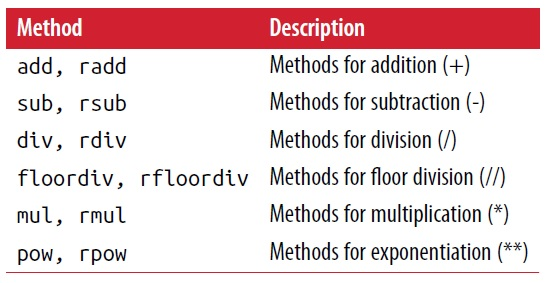

Cada um de eles têm uma contrapartida, começando com a letra *r*, que tem os argumentos invertidos. Então estes dois comandos são equivalentes:

In [162]:
1 / df1

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [163]:
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


Da mesma forma, ao reindexar uma **Serie** ou **DataFrame**, você também pode especificar um valor de preenchimento:

In [164]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


## Operações entre DataFrame e Series

Tal como acontece com matrizes NumPy de dimensões diferentes, aritmética entre **DataFrame** e **Serie** também é definida.
- Primeiro, como um exemplo, considere a diferença entre uma matriz bidimensional e uma de suas linhas:

In [165]:
arr = np.arange(12.).reshape((3, 4))

In [166]:
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [167]:
arr[0]

array([0., 1., 2., 3.])

In [168]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

Quando subtraímos **`arr[0]`** de **`arr`**, a subtração é realizada uma vez para cada linha.
- Isso é conhecido como *broadcasting*. 
- Operações entre um **DataFrame** e uma **Serie** são semelhante:

In [169]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
.....: columns=list('bde'),
.....: index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [170]:
series = frame.iloc[0]

In [171]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [172]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

Por padrão, a aritmética entre **DataFrame** e **Series** corresponde ao índice da **Series**
nas colunas do **DataFrame**, transmitindo pelas linhas:

In [173]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


Se um valor de índice não for encontrado nas colunas do **DataFrame** ou no índice da **Serie**, os objetos serão reindexados para formar a união:

In [174]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])

In [176]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


Se você quiser, em vez disso, transmitir pelas colunas, combinando nas linhas, você deve
usar um dos métodos aritméticos. Por exemplo:

In [177]:
series3 = frame['d']

In [178]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [179]:
frame.sub(series3, axis='index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


O número do eixo que você passa é o eixo para a correspondência. Neste caso, queremos combinar
no índice de linha do **DataFrame** (axis='index' ou axis=0) e transmitir.

## Aplicação de funções e mapeamento

**ufuncs** de **NumPy** (métodos de array elemento a elemento) também funcionam com objetos **pandas**:

In [180]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
.....: index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [181]:
frame

,b,d,e
Utah,1.254060,-0.963356,1.223657
Ohio,1.980693,-0.966306,-1.005762
Texas,0.759094,0.118347,0.654273
Oregon,0.551201,0.558584,-0.833166


In [182]:
np.abs(frame)

,b,d,e
Utah,1.254060,0.963356,1.223657
Ohio,1.980693,0.966306,1.005762
Texas,0.759094,0.118347,0.654273
Oregon,0.551201,0.558584,0.833166


Outra operação frequente é aplicar uma função em matrizes unidimensionais a cada
coluna ou linha. O método **apply** do **DataFrame** faz exatamente isso:

In [184]:
f = lambda x: x.max() - x.min()

Aqui, a função **_f_**, que calcula a diferença entre o máximo e o mínimo
de uma **Serie**, é invocado uma vez em cada coluna no quadro.
- O resultado é uma **Serie** com as colunas do **DataFrame** como seu índice.

Se passamos **axis='columns'** para **apply**, a função será invocada uma vez por linha:

In [185]:
frame.apply(f, axis='columns')

Utah      2.217416
Ohio      2.986455
Texas     0.640746
Oregon    1.391750
dtype: float64

Muitas das estatísticas de matriz mais comuns (como soma e média) são métodos **DataFrame**,
portanto, o uso de **apply** não é necessário.

A função passada para **apply** não precisa retornar um valor escalar; ele também pode retornar uma **Serie** com vários valores:

In [186]:
def f(x): return pd.Series([x.min(), x.max()], index=['min', 'max'])

In [187]:
frame.apply(f)

,b,d,e
min,0.551201,-0.966306,-1.005762
max,1.980693,0.558584,1.223657


As funções do Python em elemento a elementos também podem ser usadas. Suponha que você queira calcular uma string formatada de cada valor de ponto flutuante em uma coluna. 
- Você pode fazer isso com **applymap**:

In [188]:
format = lambda x: '%.2f' % x

In [189]:
frame.applymap(format)

,b,d,e
Utah,1.25,-0.96,1.22
Ohio,1.98,-0.97,-1.01
Texas,0.76,0.12,0.65
Oregon,0.55,0.56,-0.83


A razão para o nome **applymap** é que **Series** tem um método de mapeamento para aplicar uma
função elemento a elemento:

In [190]:
frame['e'].map(format)

Utah       1.22
Ohio      -1.01
Texas      0.65
Oregon    -0.83
Name: e, dtype: object

## Ordenação e ranqueamento

Ordenar um conjunto de dados por algum critério é outra operação importante. 
- Para ordenar lexicograficamente por índice de linha ou coluna, use o método **sort_index**, que retorna um novo objeto ordenado:

In [191]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])

In [192]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

Com um **DataFrame**, você pode ordenar por índice em qualquer um dos eixos:

In [193]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
.....: index=['three', 'one'],
.....: columns=['d', 'a', 'b', 'c'])

In [194]:
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [195]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [196]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


Os dados são ordenados em ordem crescente por padrão, mas podem ser ordenados em ordem decrescente:

In [197]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


Para ordenar uma **Serie** por seus valores, use o método **sort_values**:

In [198]:
obj = pd.Series([4, 7, -3, 2])

In [199]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

Quaisquer valores ausentes são ordenados no final da **Serie** por padrão.

Ao ordenar um **DataFrame**, você pode usar os dados em uma ou mais colunas como a chave para a ordenação. 
- Para fazer isso, passe um ou mais nomes de coluna para a opção **by** de **sort_values:**

In [200]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})

In [201]:
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [202]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


Para ordenar por várias colunas, passe uma lista de nomes:

In [203]:
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


O ranqueamento atribui classificações de 1 ao número de instâncias de dados válidas em uma matriz.
- Ambos **Series** e **DataFrame** têm um método **rank**. 
- Empates são resolvidos atribuindo o rank médio.

In [204]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])

In [205]:
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

As classificações também podem ser atribuídas de acordo com a ordem em que são observadas no
dados:

In [206]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

Aqui, em vez de usar a classificação média de 6,5 para as entradas 0 e 2, elas foram
definidas como 6 e 7 porque o rótulo 0 precede o rótulo 2 nos dados.
- Você também pode ranquear em ordem decrescente:

In [207]:
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

Métodos de desempate

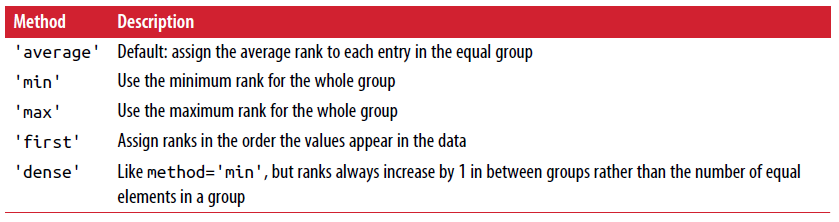

O DataFrame pode calcular ranques sobre as linhas ou colunas:

In [208]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
.....: 'c': [-2, 5, 8, -2.5]})

In [209]:
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [210]:
frame.rank(axis='columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


### Índices de eixo com rótulos duplicados

Até agora, todos os exemplos que vimos tinham rótulos de eixo exclusivos (valores de índices). Embora muitas funções do **pandas** (como **reindex**) exijam que os rótulos sejam
únicos, não é obrigatório. 

Vamos considerar uma pequena **Serie** com índices duplicados:

In [211]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])

In [212]:
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

A propriedade **is_unique** do índice pode dizer se seus rótulos são exclusivos ou não:

In [213]:
obj.index.is_unique

False

- A seleção de dados é uma das principais coisas que se comporta de maneira diferente com duplicatas. 
- A indexação de um rótulo com várias entradas retorna uma **Serie**, enquanto entradas únicas retornam um valor escalar:

In [214]:
obj['a']

a    0
a    1
dtype: int64

In [215]:
obj['c']

4

Isso pode tornar seu código mais complicado, pois o tipo de saída da indexação pode
variar com base em se um rótulo é repetido ou não.

A mesma lógica se estende para indexar linhas em um **DataFrame**:

In [216]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])

In [217]:
df

,0,1,2
a,0.932137,-0.358448,1.443262
a,-0.602548,-0.103491,-1.885799
b,0.456691,1.281257,-0.126333
b,0.792794,-0.782039,-0.126250


In [218]:
df.loc['b']

,0,1,2
b,0.456691,1.281257,-0.126333
b,0.792794,-0.782039,-0.126250


## Resumindo e calculando estatísticas descritivas

Os objetos **pandas** são equipados com um conjunto de métodos matemáticos e estatísticos básicos.
- A maioria deles se enquadra na categoria de reduções ou estatísticas descritivas,
    - métodos que extraem um único valor (como a soma ou média) de uma **Serie** ou de uma série de valores das linhas ou colunas de um **DataFrame**. 
    - Comparado com os métodos semelhantes encontrados em arrays **NumPy**, eles têm um tratamento integrado para dados ausentes. 
    
Considere um pequeno **DataFrame**:

In [219]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
.....: [np.nan, np.nan], [0.75, -1.3]],
.....: index=['a', 'b', 'c', 'd'],
.....: columns=['one', 'two'])

In [220]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


Chamar o método **sum** de **DataFrame** retorna uma **Serie** contendo as somas de colunas:

In [221]:
df.sum()

one    9.25
two   -5.80
dtype: float64

Passar **axis='columns'** ou **axis=1** realiza a soma nas colunas:

In [222]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

Os valores NaN são excluídos, a menos que toda a fatia (linha ou coluna, neste caso) seja NaN.
- Isso pode ser desabilitado com a opção **skipna**:

In [223]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

Alguns métodos, como **idxmin** e **idxmax**, retornam estatísticas indiretas como o valor do índice onde os valores mínimo ou máximo são atingidos:

In [224]:
df.idxmax()

one    b
two    d
dtype: object

Outros métodos são acumulações:

In [225]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


**describe** produz várias estatísticas de resumo de uma vez:

In [235]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


Em dados não numéricos, describe produz estatísticas de resumo alternativas:

In [236]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)

In [238]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

Lista completa de estatísticas resumidas e métodos relacionados

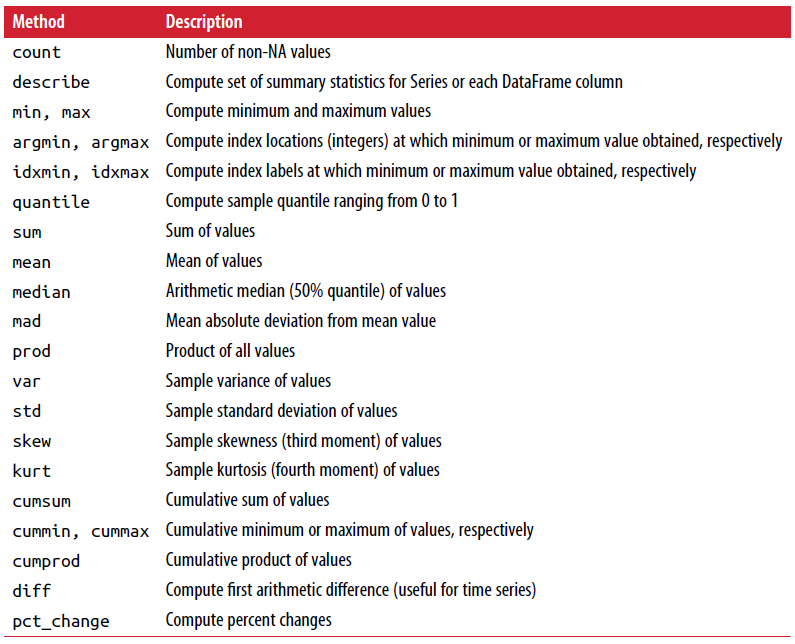

### Valores exclusivos, contagens de valores e membros

Outra classe de métodos relacionados extrai informações sobre os valores contidos em uma
**Serie** unidimensional. Para ilustrar isso, considere este exemplo:

In [226]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

A primeira função é **unique**, que fornece uma matriz dos valores exclusivos em uma **Serie**:

In [227]:
uniques = obj.unique()

In [228]:
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

- Os valores únicos não são necessariamente retornados em ordem, mas podem ser ordenados usando **uniques.sort()**). 

- Da mesma forma, **value_counts** calcula uma **Serie** contendo a frequências dos valores:

In [229]:
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

A **Serie** é ordenada por valor em ordem decrescente para sua conveniência. **value_counts** é
também disponível como um método de **pandas** que pode ser usado com qualquer array ou
seqüência:

In [244]:
pd.value_counts(obj.values, sort=False)

d    1
c    3
a    3
b    2
dtype: int64

**isin** realiza uma verificação de associação de conjunto vetorizado e pode ser útil na filtragem de um conjunto de dados por um subconjunto de valores em uma **Serie** ou coluna em um **DataFrame**:

In [230]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [231]:
mask = obj.isin(['b', 'c'])

In [247]:
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [232]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

Relacionado a **isin**, o método **Index.get_indexer** fornece uma matriz de índices
de uma matriz de valores possivelmente não distintos em outra matriz de valores distintos:

In [233]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])

In [234]:
unique_vals = pd.Series(['c', 'b', 'a'])

In [235]:
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2], dtype=int64)

**unique*, **value_counts**, e métodos de pertinência

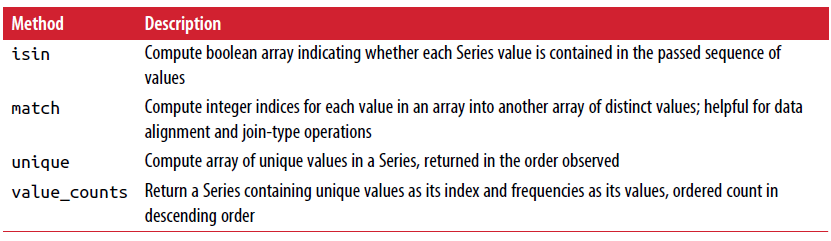

Em alguns casos, você pode querer calcular um histograma em várias colunas relacionadas em
um **DataFrame**. Aqui está um exemplo:

In [5]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
.....: 'Qu2': [2, 3, 1, 2, 3],
.....: 'Qu3': [1, 5, 2, 4, 4]})

In [6]:
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


Passando **pandas.value_counts** para a função **apply**:

In [7]:
result = data.apply(pd.value_counts).fillna(0)

In [8]:
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


Aqui, os rótulos de linha no resultado são os valores distintos que ocorrem em todas as colunas. 
- Correspondem às respectivas contagens desses valores em cada coluna.

### Correlação e Covariância

Algumas estatísticas de resumo, como *correlação* e *covariância*, são calculadas a partir de pares de argumentos. 
- Vamos considerar alguns **DataFrames** de preços de ações e volumes obtidos do *Yahoo! Financie* usando o pacote **pandas-datareader**.

https://medium.com/@cesar.vieira/analisando-a%C3%A7%C3%B5es-da-bovespa-parte-i-500107703688

In [1]:
from pandas_datareader import data as wb

In [2]:
import pandas as pd

In [6]:
TickerA='ITSA4.SA'
TickerB='FLRY3.SA'
TickerC='LREN3.SA'
prices=pd.DataFrame()
tickers = [TickerA, TickerB, TickerC]
for t in tickers:
    prices[t]=wb.DataReader(t, data_source='yahoo', start='2010-1-1')['Adj Close']

In [7]:
prices

,ITSA4.SA,FLRY3.SA,LREN3.SA
Date,,,
2010-01-04,3.940176,NaN,NaN
2010-01-05,3.927432,NaN,NaN
2010-01-06,3.879655,NaN,NaN
2010-01-07,3.857359,NaN,NaN
2010-01-08,3.828690,NaN,NaN
2010-01-11,3.815952,NaN,NaN
2010-01-12,3.815952,NaN,NaN
2010-01-13,3.803208,NaN,NaN
2010-01-14,3.749056,NaN,NaN


In [9]:
returns = prices.pct_change()

In [10]:
returns.tail()

,ITSA4.SA,FLRY3.SA,LREN3.SA
Date,,,
2020-12-15,0.019504,-0.017486,0.021758
2020-12-16,0.013913,0.024101,0.006302
2020-12-17,0.000858,-0.010500,-0.017491
2020-12-18,-0.002571,-0.010611,0.003077
2020-12-21,-0.014605,0.000000,-0.018737


O método **corr** de **Serie** calcula a correlação das sobreposições, não NaN, dos
valores alinhados por índice em duas **Series**. Da mesma forma, **cov** calcula a covariância:

In [11]:
returns['ITSA4.SA'].corr(returns['FLRY3.SA'])

0.31814376543382555

In [12]:
returns['ITSA4.SA'].cov(returns['FLRY3.SA'])

0.00012757896023442143

Os métodos **corr** e **cov** de **DataFrame**, por outro lado, retornam uma matriz com a correlação ou covariância entre todos os pares de ativos como DataFrame, respectivamente:

In [14]:
returns.corr()

,ITSA4.SA,FLRY3.SA,LREN3.SA
ITSA4.SA,1.000000,0.318144,0.560498
FLRY3.SA,0.318144,1.000000,0.374443
LREN3.SA,0.560498,0.374443,1.000000


In [15]:
returns.cov()

,ITSA4.SA,FLRY3.SA,LREN3.SA
ITSA4.SA,0.000389,0.000128,0.000256
FLRY3.SA,0.000128,0.000408,0.000174
LREN3.SA,0.000256,0.000174,0.000528


Usando o método **corrwith** do **DataFrame**, você pode calcular correlações de pares
entre as colunas ou linhas de um **DataFrame** com outra **Serie** ou **DataFrame**. Passando por uma
**Serie** retorna uma **Serie* com o valor de correlação calculado para cada coluna:

In [17]:
returns.corrwith(returns['ITSA4.SA'])

ITSA4.SA    1.000000
FLRY3.SA    0.318144
LREN3.SA    0.560498
dtype: float64

In [20]:
returns.describe()

,ITSA4.SA,FLRY3.SA,LREN3.SA
count,2708.000000,2110.000000,2110.000000
mean,0.000589,0.000820,0.001228
std,0.019723,0.020206,0.022982
min,-0.109442,-0.152542,-0.211201
25%,-0.010642,-0.010436,-0.011499
50%,0.000000,0.000000,0.000000
75%,0.011318,0.011219,0.013103
max,0.102696,0.111064,0.165129
